# Image compression Khaliq Aghakarimov


During the two following chapters, we present many different tools of signal processing, which all are used in JPEG 
 (Joint Photographic Experts Group). 



## Setting Khaliq Aghakarimov

### Pull data Khaliq Aghakarimov

In [0]:
"we import (=clone) all the data or just update (=pull) them"

import os

if not os.path.exists("assets_signal"):
    print("the directory assets_signal is create")
    !git clone https://github.com/vincentvigon/assets_signal
else:
    print("the directory assets_signal is updated")
    %cd assets_signal
    !git pull https://github.com/vincentvigon/assets_signal
    %cd ..

the directory assets_signal is create
Cloning into 'assets_signal'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 120 (delta 28), reused 108 (delta 16), pack-reused 0
Receiving objects: 100% (120/120), 9.23 MiB | 22.34 MiB/s, done.
Resolving deltas: 100% (28/28), done.


### Import Khaliq Aghakarimov

In [0]:
%reset -f

In [0]:
import numpy as np
np.set_printoptions(linewidth=5000,suppress=True,precision=5)

import scipy
import scipy.signal
import scipy.fftpack

import  matplotlib.pyplot as plt
plt.style.use("default")

import imageio
import IPython
import json

import pywt
import pywt.data

## Tensorisation principle Khaliq Aghakarimov

### Two vector spaces Khaliq Aghakarimov

Warning: in a family of vectors: $(v^0,v^1,v^2,...)$ the exponent (at top) is used to indicate the place in the family, while the index (at bottom)  is used for the coordinates of each vector. Ex:
$$
v^0=(v^0_0,v^0_1,v^0_2,...)
$$

We consider a first setting:

* An integer $M$. 
* The set of vectors $\mathbb R^M$ (seen as discrete signals)

* A discrete dot product 
 $$
 \mathtt{sca}_M(a,b)  =  c_M \sum_i a_i    b_i
 $$ 
 where $c_M$ is a constant (ex: $c_M=\frac 1M$). 

* An orthonormal basis  
$$
v^0,..., v^{M-1}
$$ 


* Which allows us  to define the inversible transformation $\mathcal T_M$:
 \begin{alignat}{1} 
    \mathcal T_M(a)_k  & =  \mathtt{sca}_M (a, v^k  ) \\
    a &= \sum_k  \mathcal  T_M(a)_k \ v^k
\end{alignat}


Then we consider a second integer $N$, the space $\mathbb R^N$, a scalar product  $\mathtt{sca}_N$ and an orthonormal basis $w^0,..., w^{N-1}$.



***To you:*** We write $\check v^k_i = v_k^i$. So  as a matrix $\check v$, is the transpose of $v$. We define: 
$$
\mathcal {T}^{-1}_M(a)_k   =  \mathtt{sca}_M (a,  \check v^k  )
$$
$(4\heartsuit\flat)$ show that 
$$
\mathcal {T}_M \Big( \mathcal {T}^{-1}_M(a) \Big) =a
$$
... or perhaps not exactly ...


### One matrix space Khaliq Aghakarimov




Now we consider:

* $\mathbb{R}^{M\times N}$ the space of matrices of size $M \times N$
* The scalar product 
$$
\mathtt{sca}_{MN}(A,B) =   {c_M c_N} \sum_{ij} A_{ij}  {B}_{ij}
$$
*  For $  k \in \{0,...,M-1\} $ and $ l \in \{0,...,N-1\}$ we define the matrix $X^{kl}$ by: 
$$
X^{kl}_{ij} = v^k_i w^l_j
$$
(one say that $X^{kl}$ is the tensor product of $v^k$ and $w^l$). 

***Theorem:*** The family $\big (X^{kl}  \big ) $ is an orthonormal basis of $\mathbb{R}^{MN}$ . 

***To you:*** $(4\heartsuit)$. Prove this theorem. This is elementary! 



***To you:*** 

* $(1\heartsuit)$. What must you change, if you work with complex vectors?

* $(2\heartsuit)$. Do you think that the tensorisation principle also works for continuous functions? If yes, write shortly which formulas change.





### The associated transformation Khaliq Aghakarimov

To our matrix-basis we can associate an inversible transformation $\mathcal T_{MN}$: 
\begin{alignat}{1} 
 \mathcal T_{MN}( A)  _{kl} &=  sca_{MN}   ( A , X^{kl}) \\
 A &= \sum_{kl}  \mathcal T_{MN}( A)  _{kl} \  X^{kl}
\end{alignat}


Let's rewrite the filrst line:  
\begin{alignat}{1} 
 \mathcal T_{MN}( A)_{kl}  & =   {c_M c_N}   \sum_{i,j} A_{ij}   v^{k}_i   w^l_j \\
 &= {c_N}  \sum_j  \Big ( {c_M}  \sum_{i} A_{ij}    v^{k}_i \Big)  w^l_j \\
 &= {c_N}  \sum_j  \Big ( \mathcal T_M(A_{: j} )_k  \Big)  w^l_j \\
\end{alignat}
where $A_{: j}$ is the
$j$-ieme column of $A$.

 So we see that, to compute $ \mathcal T_{MN}(A)$, we apply $\mathcal T_M$ on each column of $A$. Stacking the results we get a matrix $\tilde A$. Then we apply $\mathcal T_N$ on every line of $\tilde A$.  
 
 
***To you:*** $(2\heartsuit\flat)$ Show by a similary calculus, that we can compute $\mathcal T_{MN}(A)$ by making a transformation firstly on lines, secondly on columns.   
 
 

## Cosinus basis Khaliq Aghakarimov

### formulas Khaliq Aghakarimov

Here we present the 1D basis. The 2D basis is obtain thanks to the tensorisation. 


*  Recall you the discrete exponentials, which has the inconvenient to take complex values:
$$
e^k_j = e^{2i\pi \frac {jk}N} \qquad \text{k=0,...,N-1}
$$
which are ortonormale for the hermitian produc $\mathtt{her}(v,w) = \frac 1  N    \sum_i v_i \bar w_i$.    


* We can also construct a sin-cos discrete basis (as we did in for continuous time). But it is rarely made because it is not practical to work with two kind of functions. 


* The realy usefull basis is the Discrete-Cosinus-basis (often abreviate by DC):
$$
b^k_j = c_k \cos\Big( (2 j +1)  \frac{ \pi k}  {2N}  \Big)
$$
with  $c_0 = \sqrt{\frac 1 N}$ and for $k>0: $ $ c_k = \sqrt{\frac 2 N}$. 


***To you:*** $(2\heartsuit)$ Could you explain, with few words (no formulas), the trick wich allows to make a basis with only cosinus in the  continuous time context. In the discrete time context, it is the same trick, but a bit more complicated because we have to take care of the parity of $N$. 


***To you:*** Let's define the vectors $\delta=(1,0,0,...,0)$ and  $\mathbf 1= (1,1,1,...,1)$. Show that, up to a multiplicative constant, the cosinus-transform of $\mathbf 1$ is $\delta$. Help: it is very easy to prove the converse. 



### Discrete cosinus basis by hand Khaliq Aghakarimov

Let's look in details the discrete cosinus basis which is used for the JPEG compression.

### 1D Khaliq Aghakarimov

In [0]:
N=10
basis=np.empty((N,N))
i=np.arange(N)
for k in range(N):
    basis[k,:]=np.cos( (2.* i +1)*np.pi*k/(2.*N))
    if k==0 :
        basis[k, :]*=np.sqrt(1 / N)
    else :
        basis[k, :]*=np.sqrt(2 / N)

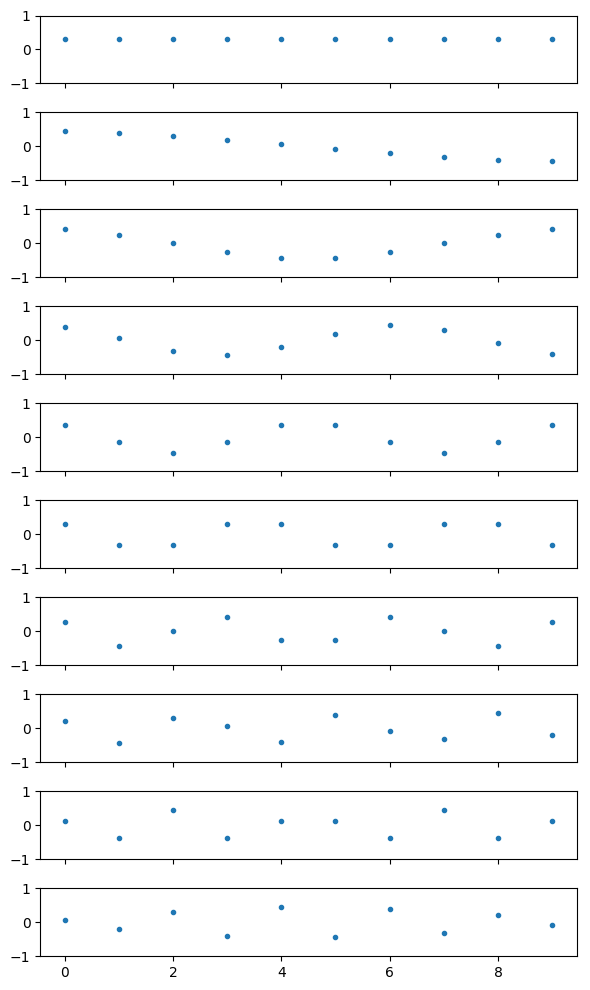

In [0]:
fig,axs=plt.subplots(N,1,figsize=(6,N),sharex=True)
for k in range(N):
    axs[k].plot(i,basis[k, :],'.')
    axs[k].set_ylim(-1,1)
fig.tight_layout()

***To you:*** $(2\heartsuit)$ Check that this basis is orthonormal for the discrete scalar product: 
$$
\mathtt{sca}(u,v)=\sum_i u_i v_i
$$
Help: use the matrix product `@`. 


### 2D Khaliq Aghakarimov

***To you:*** 

* $(3\heartsuit)$ Define the matrix-basis produced by the tensorisation of the previous basis: so you have to make a 4-dimension tensor:

                            basis2[k,l,i,j] = basis[k,i] basis[l,j] 

* Please, keep the index-names of our theoretical presentation: so `k,l` represent the basis element, and `i,j` are the indexes of a matrix)

* Help: use `np.newaxis`

* $(2\heartsuit)$ Make some gry-level plot to validate your program. 



### Fast cosinus transformations Khaliq Aghakarimov

***To you:*** $(2\heartsuit)$ Let us denote by $\mathcal F_N$ the discrete Fourier transforme and by $\mathcal C_N$ the cosinus transform. Find formulas to express the one according to the other and vice versa. 

Because of the previous exercice, it is not surprising that their exists a fast cosinus transform which is already implemented: `scipy.fftpack.dct`. But the 2D version is not implemented. Let's do it:




In [0]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')


***To you:*** 
 
*  $(1\heartsuit)$  Explain our 2D implementation above.
*  $(1\heartsuit)$   What could mean the parameter `norm='ortho'`?

In [0]:
"test"
a=np.ones((5,5))
hat_a=dct2(a)
print(hat_a)

[[ 5. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


***To you:*** $(2\heartsuit\flat)$ Can you explain theoriticaly, why the transform of `np.ones((5,5))` is the matrix above. 

In [0]:
print(idct2(hat_a))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


## JPEG Khaliq Aghakarimov

### The basis Khaliq Aghakarimov

We plot the $8\times8$ elements of the matrix-basis.

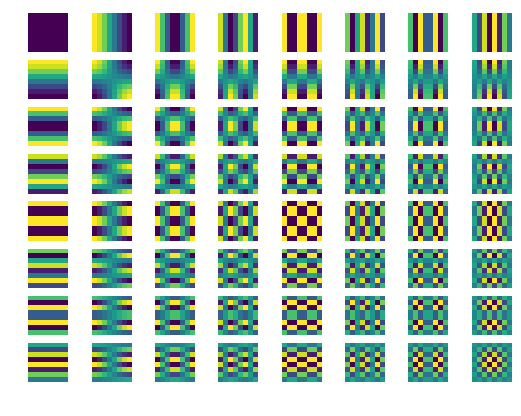

In [0]:
for i in range(8):
    for j in range(8):
        a=np.zeros((8,8))
        a[i,j]=1
        plt.subplot(8,8,i*8+j+1)
        plt.axis('off')
        plt.imshow(idct2(a))

### Cutting and transformation Khaliq Aghakarimov

In [0]:
"""
We:
1/ cut the image into 8*8 square
2/ transform each square with the dct2 """
def cutAndTransform(im):
    im_size = im.shape
    dct = np.zeros(im_size)

    """ the object "np.r_"  allows to produce arrays of indices using the 'slicing notation' (ex: 4:5:2 )  """
    for i in np.r_[:im_size[0]:8]:
        for j in np.r_[:im_size[1]:8]:
            dct[i:(i + 8), j:(j + 8)] = dct2(im[i:(i + 8), j:(j + 8)])

    return dct

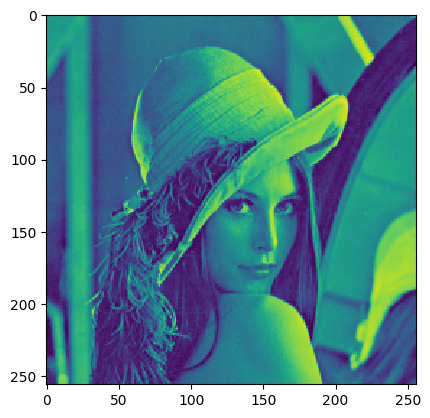

In [0]:
lena=imageio.imread("assets_signal/lena_256_NB.png")
plt.imshow(lena);

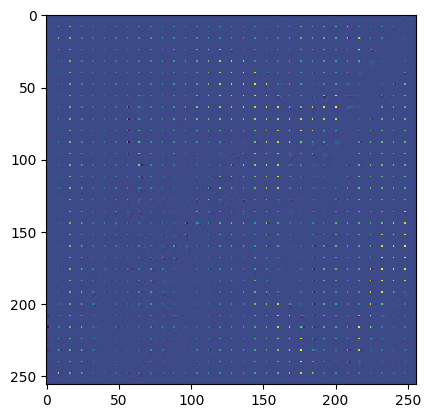

In [0]:
dct=cutAndTransform(lena)
plt.imshow(dct);

***To you:*** $(2\heartsuit)$ Why can we barely recognize lena with the above plot? Please be precise. 

### Reconstruction Khaliq Aghakarimov

In [0]:
def recons(dct):
    im_size=dct.shape
    res = np.zeros(im_size)

    for i in np.r_[:im_size[0]:8]:
        for j in np.r_[:im_size[1]:8]:
            res[i:(i + 8), j:(j + 8)] = idct2(dct[i:(i + 8), j:(j + 8)])
    return res

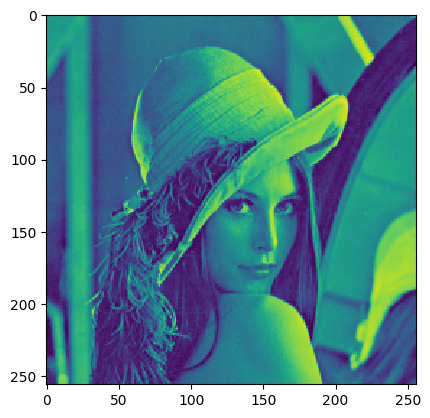

In [0]:
plt.imshow(recons(dct));

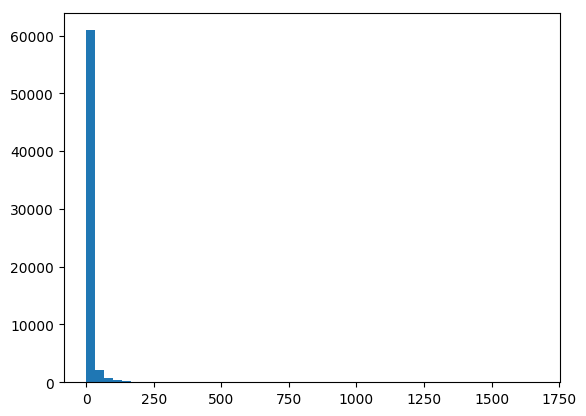

In [0]:
abs_dct_flatten=np.abs(dct).flatten()
plt.hist(abs_dct_flatten,50);

***To you:*** $(1\heartsuit)$ What does show the previous histogram? 

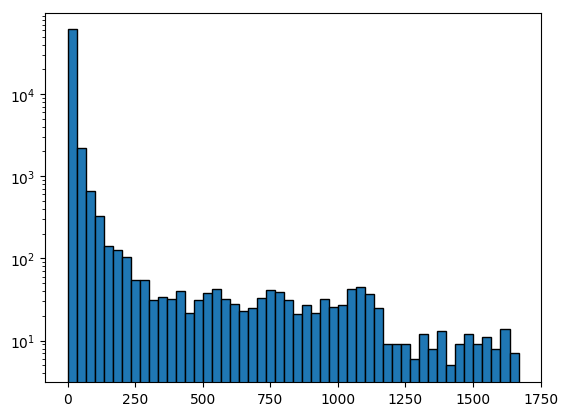

In [0]:
"better in loc-scale:"
plt.hist(np.abs(dct).flatten(),bins=50,edgecolor="k")
plt.yscale('log');

### Compression Khaliq Aghakarimov

In [0]:
threshold=np.sort(abs_dct_flatten)[int(len(abs_dct_flatten)*0.9)]
threshold

22.466095601690903

***To you:*** $(1\heartsuit)$ Explain how did we choose the threshold.

In [0]:
canceled=(np.abs(dct)<threshold)

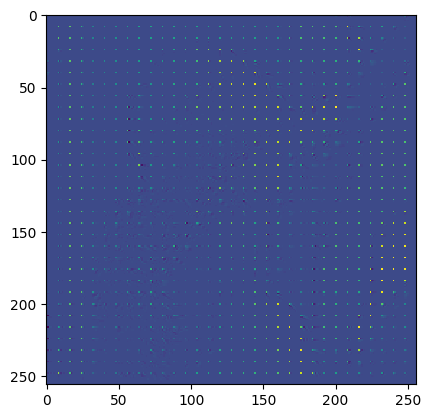

In [0]:
dct_thresh=dct.copy()
dct_thresh[canceled]=0
plt.imshow(dct_thresh);

***To you:*** $(1\heartsuit)$ Plot the histogram of the cos-coordinater after thresholding. 

In [0]:
print(dct_thresh[:30,:30].astype(np.int64))

[[1060    0    0    0    0    0    0    0 1038    0    0    0    0    0    0    0 1135  -51    0    0    0    0    0    0  954  193  -35    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   23    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 

***To you:*** $(1\heartsuit)$ what can we note in the above matrix?

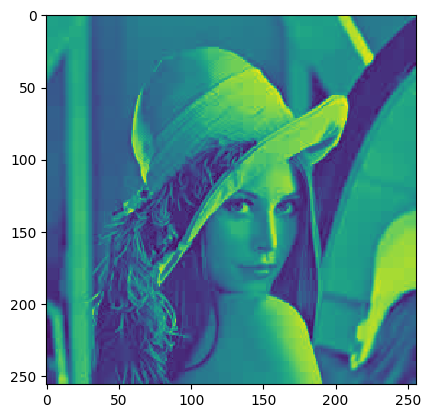

In [0]:
im_recons=recons(dct_thresh)
plt.imshow(im_recons);

***To you:*** $(1\heartsuit)$ Roughly speaking, the principle of JPEG compression is 

* 1/ express the image in a special basis.
* 2/  cancel all the small coordinates. 

But why need we the step 1? Why don't we directly work with the canonical basis? 


***To you:*** $(2\heartsuit)$ Does the previous application `img` $\to$ `img_compress`  is linear. Justify.  

### The good quantization Khaliq Aghakarimov



Let us considere
a $8\times 8$ matrix $M$ containing the  coefficients of the DCT.
To quantized this matrix we can do

        (M//Q)*Q 
        
where `Q` is one of the matrices bellow.

***To you:***  

* $(1\heartsuit)$ what could be the meaning of the number 10, 50 and 90 after `Q`?  
* $(1\heartsuit)$  why do not we take constant matrices for `Q`?


***To you:*** $(2\heartsuit)$ With the previous quantization, does the application `img` $\to$ `img_compress`  is  linear? (perhaps the response is not 'yes' or 'no'). 



In [0]:

Q50= np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99],
                ])

Q10 = np.array([[80, 60, 50, 80, 120, 200, 255, 255],
                [55, 60, 70, 95, 130, 255, 255, 255],
                [70, 65, 80, 120, 200, 255, 255, 255],
                [70, 85, 110, 145, 255, 255, 255, 255],
                [90, 110, 185, 255, 255, 255, 255, 255],
                [120, 175, 255, 255, 255, 255, 255, 255],
                [245, 255, 255, 255, 255, 255, 255, 255],
                [255, 255, 255, 255, 255, 255, 255, 255],
                ])

Q90 = np.array([[3, 2, 2, 3, 5, 8, 10, 12],
                [2, 2, 3, 4, 5, 12, 12, 11],
                [3, 3, 3, 5, 8, 11, 14, 11],
                [3, 3, 4, 6, 10, 17, 16, 12],
                [4, 4, 7, 11, 14, 22, 21, 15],
                [5, 7, 11, 13, 16, 12, 23, 18],
                [10, 13, 16, 17, 21, 24, 24, 21],
                [14, 18, 19, 20, 22, 20, 20, 20],
                ])

### Zigzag reading Khaliq Aghakarimov







In [0]:

def zigzag(n:int)->np.ndarray:
    """
    from https://rosettacode.org/wiki/Zig-zag_matrix.
    at this adress, you also can find a second algo, using a special ordering of pairs.
    """
    def move(i, j):
        if j < (n - 1):
            return max(0, i - 1), j + 1
        else:
            return i + 1, j
        
    a=np.zeros((n,n))
    x, y = 0, 0
    for v in range(n * n):
        a[y,x] = v
        if (x + y) & 1:
            x, y = move(x, y)
        else:
            y, x = move(y, x)
    return a

The  function above travels accross a matrix using a special path. 

***to you:*** $(1\heartsuit)$ Explain the interest of this path to store the DTF coef. 

In [0]:
print(zigzag(5))

[[ 0.  1.  5.  6. 14.]
 [ 2.  4.  7. 13. 15.]
 [ 3.  8. 12. 16. 21.]
 [ 9. 11. 17. 20. 22.]
 [10. 18. 19. 23. 24.]]


***To you:***  Modify the `zigzag()` function above to create 2 functions:

* $(3\heartsuit)$  `matToList(M)` will transform a $8\times 8$ matrix to an vector of size 64 corresponding the zigzag reading of the matrix. 

*  $(3\heartsuit)$ `listToMat(L)` will to the inverse operation. 

Help: they are very few thing to modify. You can even do this without finely understand the mecanic of the `zigzag` function. 


### Your own compression Khaliq Aghakarimov

News:  To avoid viruses,  a new law was edited by the ONU: From today, all files which transit via internet must be text file.  As chief ingenier of your company, you have to create a specific format for images. 

Your first idea is the following:

In [0]:
lena=imageio.imread("assets_signal/lena_256_NB.png")
lena_list=np.ndarray.tolist(lena)
lean_str=json.dumps(lena_list)
print(lean_str)
len(lean_str)

OK, its a good starting, but the string is a bit too long. 


Because you have  good souvenirs of you signal lectures, your second idea is too mimic the JPEG process. So you:

* $(6\heartsuit)$ Create a function `compress()` which has two args:  a gray scale image (a `numpy` matrix)  and an argument determining the quantization (= the choice of  the `Q`).  This function return a JSON string  containing the DCT coefs, stored by packages. 

* $(6\heartsuit)$ Create a function `decompress()` which transform the JSON-string into a numpy-matrix. Help: to parse the JSON-string into a list see blow. 


* $(6\heartsuit)$ Make some test and compare the compression you get according to the quantization you chose. 


***Remark:*** Your old teacher of signal was a bit blury in his explanations: because he liked that you find the details by yourself...




In [0]:
"""from a string to a sequence of sequences"""
li=json.loads('[[1, 2, 3], [1, 2, 3, 4, 5], [1], [1, 2, 3]]')
print(li)
type(li)

### About file format Khaliq Aghakarimov

Of course it is a bad idea to use string-files for regular data as images. But meanwhile,  string-files are widely used for many purposes ex:

* to share data-frames generate by pandas, R, excel, openoffice... we  often use `.csv` which are simple text-files. It is practical because dataframes often mix numbers, strings, dates. But when data-frames are huge, it is better to choose the `hdf5` format. 

* to serialize object: we use `.json` which are also strings.


* To save numpy arrays as string, you can use `np.savetxt` and `np.loadtxt`. In the args, you can precise the format ex: `%.3f`  (floats with 3 decimals) or `%d` (integer). But if you have heavy numpy arrays, use  preferably `np.save` and `np.load` which create specific binary files with extention `.npy`
